# Ch02.06. 산점도

---
* 날짜:2022-04-19
* 이름:안창덕


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()
```

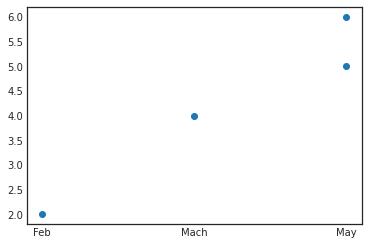

In [ ]:
x = ['Feb','Mach','May','May']
y = [2,4,6,5]
plt.scatter(x, y)
#plt.plot(x,y, marker='o', linestyle='')
plt.show()

#### | 옵션

```
plt.scatter(x, y, 
            s=None, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'
```

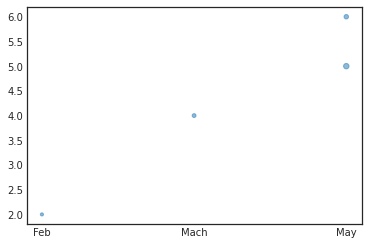

In [12]:
plt.scatter(x, y, 
            s=[10, 15, 20, 30], # 마커 크기 - x, y 길이와 동일
            c='C0', # 색깔 - x, y의 길이와 동일 
            #marker= # 마커 종류
            cmap='Blues', # 컬러맵
            #norm=None, # 정규화 여부
            alpha=.5) # 투명도
            #linewidths=None, # 테두리 두께
            #edgecolors=None) # 테두리 색깔 - 기본 'face'

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.scatterplot(x=x,y=y)
```

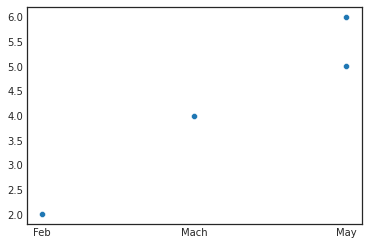

In [13]:
sns.scatterplot(x=x,y=y)

#### | 옵션

```
seaborn.scatterplot(x=None, y=None, 
                    style=None, # 마커 스타일 리스트
                    palette=None, # 컬러맵
                    alpha=None, # 투명도 
                    legend='auto' # 각주위치 {auto, brief, full, False}) 
                    
```

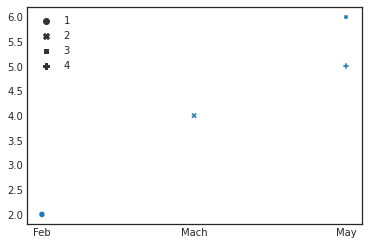

In [16]:
sns.scatterplot(x=x, y=y, 
                    style=[1,2,3,4])#, # 마커 스타일 리스트
                    #palette=None, # 컬러맵
                    #alpha=None, # 투명도 
                    #legend='auto' # 각주위치 {auto, brief, full, False}) 

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.



In [20]:
df = pd.DataFrame([x,y], ['x','y']).T
df

,x,y
0,Feb,2
1,Mach,4
2,May,6
3,May,5


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.scatter(x=x, y=y)
```




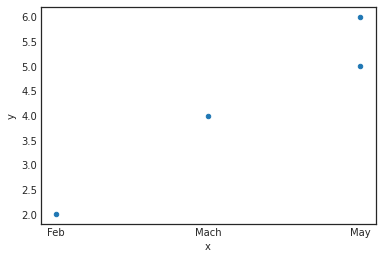

In [22]:
df.plot.scatter(x='x', y='y')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.scatterplot(data=df, x=x, y=y)
```


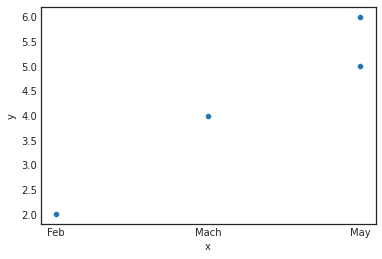

In [23]:
sns.scatterplot(data=df, x='x', y='y')


##  **실습** 
---



### (1) 데이터에 따른 크기 및 색깔 지정

```
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
```

In [25]:
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
x.shape, y.shape

((50,), (50,))

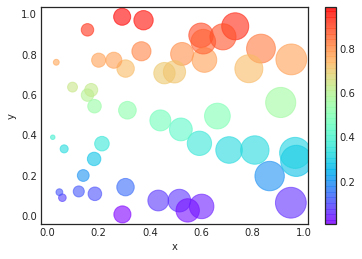

In [47]:
plt.scatter(x,y,
            c = y,
            s = x*1000,
            cmap= 'rainbow',
            alpha=.6)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### (2) 산점도를 이용한 아이리스 데이터 시각화



```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [59]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
y_names = iris.feature_names

x_data = iris.data
y_data = iris.target

df = pd.DataFrame(x_data)
df.columns = x_names
df, x_data.shape

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns], (150, 4))

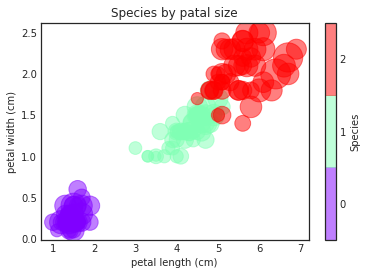

In [70]:
plt.scatter(x_data[:,2],x_data[:,3],
            c = y_data,
            s = (x_data[:,0]*x_data[:,1])**2,
            alpha=.5,
            cmap=plt.cm.get_cmap('rainbow',3))
plt.colorbar(ticks=[0,1,2], label='Species')
plt.xlabel(x_names[2])
plt.ylabel(x_names[3])
plt.title('Species by patal size')
plt.clim(-0.5, 2.5)
plt.show()


##  **과제** 
---


### (1) 산점도를 이용한 캘리포니아 집값 시각화

* 아래와 같은 산점도를 그리세요.
  * `/content/sample_data/california_housing_test.csv`을 불러오세요.
  * `x`축은 `latitude` 입니다.
  * `y`축은 `longitude` 입니다.
  * 점의 크기는 `population`에 비례합니다.
  * `median_house_value`로 색깔을 나타내고 `colorbar`를 추가합니다.
* 색과 마커, 비례 정도 등 세세한 부분은 각자의 스타일로 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0205-01.png?raw=true)

In [72]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


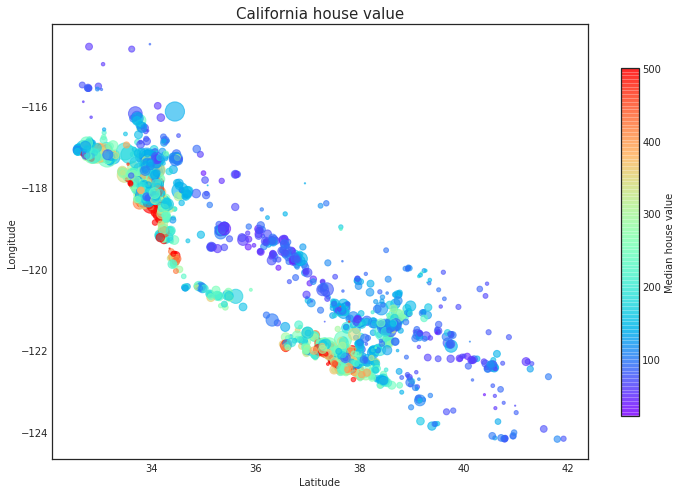

In [101]:
plt.figure(figsize=(12,8))

plt.scatter(df.latitude, df.longitude,
            s=df.population/30,
            c=df.median_house_value/1000,
            cmap='rainbow',
            alpha=.6)
           
plt.colorbar(label='Median house value', shrink=.8)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('California house value', fontsize=15)
plt.show()